In [1]:
from util import *


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Connected DB CINS_SMY - conn
Connected oraDW_ANALYTICS - conn_aly


In [3]:
query = """WITH 
T1 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_ALY_CUSTOMER_CDE_01012023),
T2 AS (
    SELECT * FROM CINS_FEATURE_STORE_REACTIVATED_01012023
    WHERE FTR_NM IN ('CASA_BAL_SUM_NOW', 'CASA_TXN_AMT_AVG_36M', 'CASA_TXN_AMT_SUM_36M', 'CASA_TXN_CT_36M', 'CASA_DAY_SINCE_LAST_TXN_CT_36M'))
    
SELECT T2.CUSTOMER_CDE, T2.FTR_NM, T2.FTR_VAL
FROM T2 INNER JOIN T1
ON T1.CUSTOMER_CDE = T2.CUSTOMER_CDE"""

In [7]:
aly = download_or_reload('data/ALY_REACT_01', query)

Len 332022


In [8]:
aly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332022 entries, 0 to 332021
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   CUSTOMER_CDE  332022 non-null  object
 1   FTR_NM        332022 non-null  object
 2   FTR_VAL       332022 non-null  object
dtypes: object(3)
memory usage: 7.6+ MB


In [9]:
aly

,CUSTOMER_CDE,FTR_NM,FTR_VAL
0,6779081,CASA_BAL_SUM_NOW,2405
1,6782204,CASA_BAL_SUM_NOW,2792
2,6781517,CASA_BAL_SUM_NOW,2397
3,6782290,CASA_BAL_SUM_NOW,2601
4,6795507,CASA_BAL_SUM_NOW,2741
...,...,...,...
332017,14014326,CASA_TXN_AMT_SUM_36M,31151121
332018,17399147,CASA_TXN_AMT_SUM_36M,1690000
332019,17398039,CASA_TXN_AMT_SUM_36M,18238000
332020,9523899,CASA_TXN_AMT_SUM_36M,1020


In [15]:
aly = aly.pivot(index='CUSTOMER_CDE', columns='FTR_NM', values='FTR_VAL')
aly

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_36M
CUSTOMER_CDE,,,,
10000375,2237,1,NaN,NaN
10000433,2311,1,NaN,NaN
10000489,2085,1,NaN,NaN
10000543,2649,1,NaN,NaN
10000622,2836,1,NaN,NaN
...,...,...,...,...
9998880,2531,1,NaN,NaN
9998896,2501,1,NaN,NaN
9998953,2363,1,NaN,NaN


In [19]:
for c in aly.columns:
    aly[c] = pd.to_numeric(aly[c],errors='coerce')

In [21]:
aly.dtypes

FTR_NM
CASA_BAL_SUM_NOW                  float64
CASA_DAY_SINCE_LAST_TXN_CT_36M      int64
CASA_TXN_AMT_SUM_36M              float64
CASA_TXN_CT_36M                   float64
dtype: object

In [24]:
aly.describe()

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_36M
count,1.412550e+05,143533.000000,2.361700e+04,23617.000000
mean,2.534669e+05,9.900831,6.000060e+07,10.274844
std,1.188352e+07,92.746852,7.485841e+08,104.951352
min,0.000000e+00,1.000000,1.000000e+00,1.000000
25%,2.150000e+03,1.000000,1.300000e+04,1.000000
50%,2.426000e+03,1.000000,3.630000e+06,3.000000
75%,2.701000e+03,1.000000,1.605000e+07,8.000000
max,2.500180e+09,1096.000000,6.000300e+10,15508.000000


<Axes: xlabel='CASA_TXN_AMT_SUM_36M', ylabel='Density'>

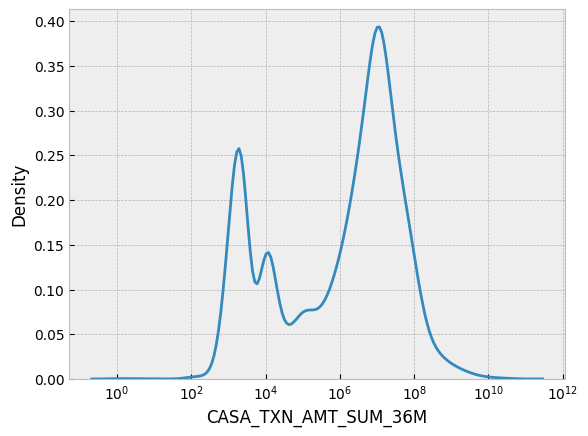

In [26]:
sns.kdeplot(aly['CASA_TXN_AMT_SUM_36M'], log_scale=True)


<Axes: xlabel='CASA_TXN_AMT_SUM_36M', ylabel='Count'>

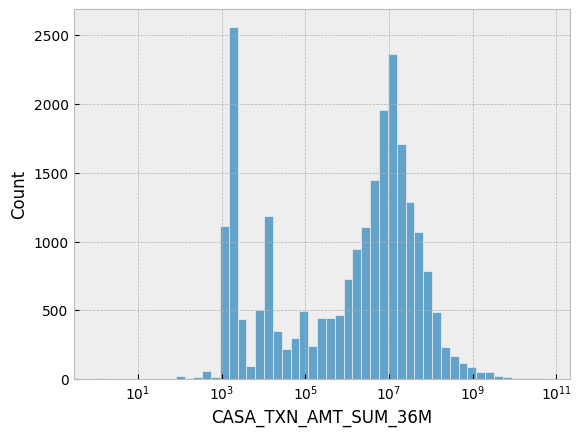

In [27]:
sns.histplot(aly['CASA_TXN_AMT_SUM_36M'], log_scale=True)

In [39]:
aly[aly['CASA_TXN_AMT_SUM_36M'].notnull()]

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_36M
CUSTOMER_CDE,,,,
10000652,2562.0,1,1011.0,1.0
10000696,2330.0,1,5850000.0,2.0
10001104,2551.0,1,1000.0,1.0
10001484,2122.0,1,65330000.0,10.0
100016,2220.0,1,2000.0,1.0
...,...,...,...,...
9990427,2216.0,1,1000.0,1.0
9991324,2601.0,1,1000.0,1.0
9997824,2253.0,1,10000.0,1.0


In [44]:
aly[aly['CASA_TXN_CT_36M'].notnull()]

FTR_NM,CASA_BAL_SUM_NOW,CASA_DAY_SINCE_LAST_TXN_CT_36M,CASA_TXN_AMT_SUM_36M,CASA_TXN_CT_36M
CUSTOMER_CDE,,,,
10000652,2562.0,1,1011.0,1.0
10000696,2330.0,1,5850000.0,2.0
10001104,2551.0,1,1000.0,1.0
10001484,2122.0,1,65330000.0,10.0
100016,2220.0,1,2000.0,1.0
...,...,...,...,...
9990427,2216.0,1,1000.0,1.0
9991324,2601.0,1,1000.0,1.0
9997824,2253.0,1,10000.0,1.0


<Axes: xlabel='CASA_TXN_CT_36M', ylabel='Count'>

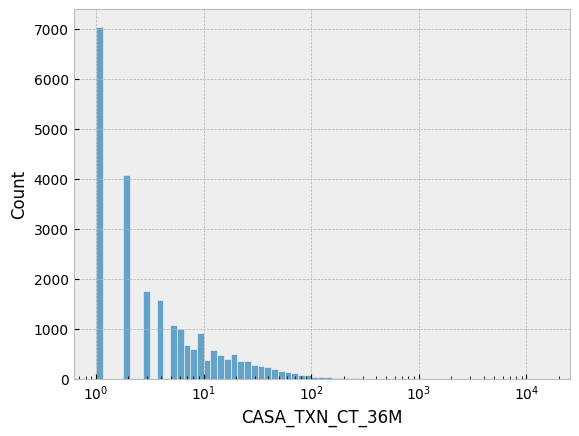

In [43]:
sns.histplot(aly['CASA_TXN_CT_36M'], log_scale=True)

# CASA_TXN_AMT_SUM_36M

In [36]:
query1 = """WITH 
T1 AS (
    SELECT * FROM CINS_REACTIVATED_CASA_ALY_CUSTOMER_CDE_01012023),
T2 AS (
    SELECT * FROM CINS_FEATURE_STORE_REACTIVATED_01012023
    WHERE FTR_NM IN ('CASA_BAL_SUM_NOW', 'CASA_TXN_AMT_AVG_36M', 'CASA_TXN_AMT_SUM_36M', 'CASA_TXN_CT_36M', 'CASA_DAY_SINCE_LAST_TXN_CT_36M')),
T3 AS (
    SELECT TXN.CUSTOMER_ID, SUM(ABS(TXN.AMT_LCY)) AS CASA_TXN_AMT_SUM_36M
FROM DW_ANALYTICS.DWA_STMT_EBANK TXN
JOIN DW_ANALYTICS.TRANSACTION_CODE TC ON TXN.TRANSACTION_CODE = TC.TRANSACTION_CODE
RIGHT JOIN CINS_REACTIVATED_CASA_ALY_CUSTOMER_CDE_01012023 TMP ON TXN.CUSTOMER_ID = TMP.CUSTOMER_CDE
WHERE TXN.PRODUCT_CATEGORY LIKE '10__'
    AND TC.INITIATION = 'CUSTOMER'  
    AND TXN.PROCESS_DT < TO_DATE('31-12-2022', 'DD-MM-YY')
    AND TXN.PROCESS_DT >= ADD_MONTHS(TO_DATE('31-12-2022', 'DD-MM-YY'), -36)
GROUP BY TXN.CUSTOMER_ID)

SELECT * FROM T3;"""

In [37]:
aly1 = download_or_reload('data/CASA_TXN_AMT_SUM_36M_01', query1)

Len 23513


In [38]:
aly1

,CUSTOMER_ID,CASA_TXN_AMT_SUM_36M
0,15111019,18673000
1,13165141,79979008
2,14537652,1516000
3,14861718,21331830
4,13730206,38928556
...,...,...
23508,17511840,20000
23509,17156125,32352325
23510,17538608,6020930
23511,17226153,17700000


<Axes: xlabel='CASA_TXN_AMT_SUM_36M', ylabel='Count'>

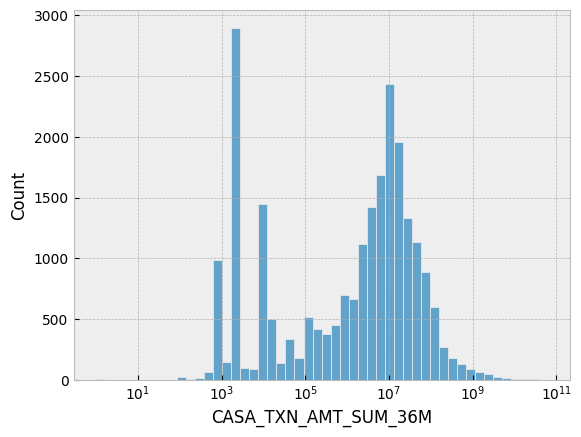

In [41]:
sns.histplot(aly1['CASA_TXN_AMT_SUM_36M'], log_scale=True)

<Axes: xlabel='CASA_TXN_CT_36M', ylabel='CASA_TXN_AMT_SUM_36M'>

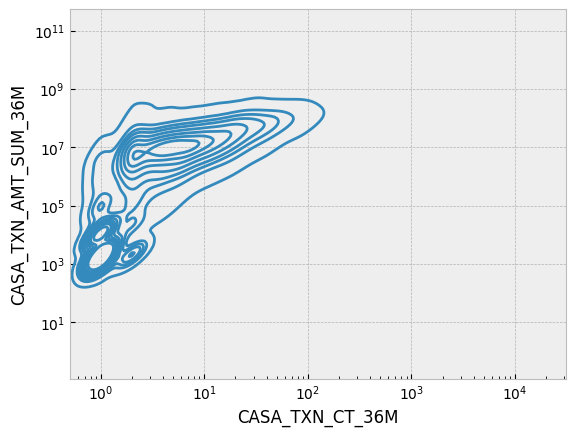

In [46]:
sns.kdeplot(aly[['CASA_TXN_AMT_SUM_36M' ,'CASA_TXN_CT_36M']], x='CASA_TXN_CT_36M', y='CASA_TXN_AMT_SUM_36M', log_scale=True)

In [58]:
aly['CASA_DAY_SINCE_LAST_TXN_CT_36M'].value_counts()

1       135601
26        2532
19        1196
1096      1031
20         958
23         273
24         151
27         139
6          135
2          134
30         123
31         111
13         105
9          103
3          101
4           92
12          87
5           77
11          76
17          67
10          66
25          62
21          60
16          56
18          51
7           46
14          45
28          32
542          2
466          2
590          2
580          1
583          1
636          1
509          1
570          1
691          1
495          1
474          1
398          1
537          1
591          1
450          1
427          1
519          1
605          1
650          1
528          1
Name: CASA_DAY_SINCE_LAST_TXN_CT_36M, dtype: int64

<Axes: xlabel='CASA_DAY_SINCE_LAST_TXN_CT_36M', ylabel='Count'>

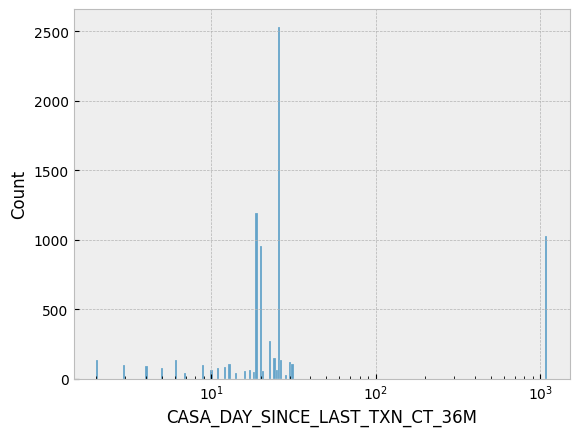

In [60]:
sns.histplot(aly[aly['CASA_DAY_SINCE_LAST_TXN_CT_36M']>1], x='CASA_DAY_SINCE_LAST_TXN_CT_36M', log_scale=True)